In [1]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
from __future__ import print_function
import numpy as np
import random
import string
import tensorflow as tf
from tensorflow.python.ops.rnn_cell import _linear
import zipfile
from six.moves import range
from six.moves.urllib.request import urlretrieve
import collections
import matplotlib.pyplot as plt
import codecs
import time
import os
import gc
from six.moves import cPickle as pickle

from plot_module import text_plot
from plot_module import structure_vocabulary_plots
from plot_module import ComparePlots

from model_module import maybe_download
from model_module import read_data
from model_module import check_not_one_byte
from model_module import id2char
from model_module import char2id
from model_module import BatchGenerator
from model_module import characters
from model_module import batches2string
from model_module import logprob
from model_module import sample_distribution
from model_module import MODEL

In [2]:
if not os.path.exists('enwik8_filtered'):
    if not os.path.exists('enwik8'):
        filename = maybe_download('enwik8.zip', 36445475)
    full_text = read_data(filename)
    new_text = u""
    new_text_list = list()
    for i in range(len(full_text)):
        if (i+1) % 10000000 == 0:
            print("%s characters are filtered" % i)
        if ord(full_text[i]) < 256:
            new_text_list.append(full_text[i])
    text = new_text.join(new_text_list)
    del new_text_list
    del new_text
    del full_text

    (not_one_byte_counter, min_character_order_index, max_character_order_index, number_of_characters, present_characters_indices) = check_not_one_byte(text)

    print("number of not one byte characters: ", not_one_byte_counter) 
    print("min order index: ", min_character_order_index)
    print("max order index: ", max_character_order_index)
    print("total number of characters: ", number_of_characters)
    
    f = open('enwik8_filtered', 'w')
    f.write(text.encode('utf8'))
    f.close()
    
else:
    f = open('enwik8_filtered', 'r')
    text = f.read().decode('utf8')
    f.close() 
    (not_one_byte_counter, min_character_order_index, max_character_order_index, number_of_characters, present_characters_indices) = check_not_one_byte(text)

    print("number of not one byte characters: ", not_one_byte_counter) 
    print("min order index: ", min_character_order_index)
    print("max order index: ", max_character_order_index)
    print("total number of characters: ", number_of_characters)    

number of not one byte characters:  0
min order index:  9
max order index:  255
total number of characters:  196


In [11]:
#different
offset = 20000
valid_size = 75000
valid_text = text[offset:offset+valid_size]
train_text = text[offset+valid_size:]
train_size = len(train_text)
print(train_size, train_text[:64])
print(valid_size, valid_text[:64])

99285000 in, some believe that it is only a matter of when an environment
75000 ture in Mutual Aid: A Factor of Evolution (1897). Subsequent ana


In [12]:
vocabulary_size = number_of_characters
vocabulary = list()
characters_positions_in_vocabulary = list()

character_position_in_vocabulary = 0
for i in range(256):
    if present_characters_indices[i]:
        vocabulary.append(unichr(i))
        characters_positions_in_vocabulary.append(character_position_in_vocabulary)
        character_position_in_vocabulary += 1
    else:
        characters_positions_in_vocabulary.append(-1)


string_vocabulary = u""
for i in range(vocabulary_size):
    string_vocabulary += vocabulary[i]
print("Vocabulary: ", string_vocabulary)
print("char2id(u'a') = %s,  char2id(u'z') = %s,  char2id(u' ') = %s" % (char2id(u'a', characters_positions_in_vocabulary),
                                                                        char2id(u'z', characters_positions_in_vocabulary),
                                                                        char2id(u' ', characters_positions_in_vocabulary)))
print("id2char(78) = %s,  id2char(156) = %s,  id2char(140) = %s" % (id2char(78,
                                                                            vocabulary),
                                                                    id2char(156,
                                                                            vocabulary),
                                                                    id2char(140,
                                                                            vocabulary)))


Vocabulary:  	
 !"#$%&'()*+,-./0123456789:;<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[\]^_`abcdefghijklmnopqrstuvwxyz{|}~ ¡¢£¤¥¦§¨©ª«¬­®¯°±²³´µ¶·¸¹º»¼½¾¿ÀÁÂÃÄÅÆÇÈÉÊËÌÍÎÏÐÑÒÓÔÕÖ×ØÙÚÛÜÝÞßàáâãäåæçèéêëìíîïðñòóôõö÷øùúûüýþÿ
char2id(u'a') = 67,  char2id(u'z') = 92,  char2id(u' ') = 2
id2char(78) = l,  id2char(156) = Ø,  id2char(140) = È


In [13]:
batch_size_test=64
num_unrollings_test=10

train_batches_test = BatchGenerator(train_text,
                                    batch_size_test,
                                    vocabulary_size,
                                    characters_positions_in_vocabulary,
                                    num_unrollings_test)
valid_batches_test = BatchGenerator(valid_text,
                                    1,
                                    vocabulary_size,
                                    characters_positions_in_vocabulary,
                                    1)

print(batches2string(train_batches_test.next(), vocabulary))
print(batches2string(train_batches_test.next(), vocabulary))
print(batches2string(valid_batches_test.next(), vocabulary))
print(batches2string(valid_batches_test.next(), vocabulary))

[u'in, some be', u'd, after su', u'uchan also ', u'bankruptcy ', u'\n[[pl:Wglow', u' CQ 42, (19', u'[Sahara]] i', u'licensed to', u'actor\n*[[19', u'  <page>\n  ', u' the differ', u'nt, althoug', u'ision>\n  </', u".\n*'''Write", u'itative sou', u'uth was one', u' verdict wa', u'called &quo', u'(Kilmer rep', u'y the time ', u' book\n | au', u' [[Rio Grou', u'=Some famou', u"ics' was co", u'==Recurring', u'olor blue o', u']], the Cha', u'{{main|Brit', u'tem and its', u' can be gen', u's and respo', u"ula's locat", u' to each ot', u'cremental Z', u'in an XML-e', u'\n        <i', u'on]] ==\n*[[', u'Vernon also', u'ed by all t', u'ly isolated', u"''\n\n[[Perfo", u'o compute x', u'eneral conc', u'on in Brita', u'nd commenta', u'ven though ', u'onatas]]\n[[', u' publisher ', u']}}. {{IPA|', u'[Nazi]] occ', u's particles', u'datum, the ', u' and decide', u'kage is sup', u'and other f', u'th I of Eng', u't economic ', u'Minister. T', u'ns. Ironica', u'Automated c', u've mild win', u'ties withi

In [14]:

class one_gate(MODEL):
    def layer(self, inp, state):
        X = tf.concat(1, [inp,
                            state[0],
                            state[1]])
        RES = tf.matmul(X, self.Matrix) + self.Bias
        state = tf.tanh(RES)
        return state

    
    def iteration(self, inp, state):
        output = self.layer(inp, state)
        gate = tf.sigmoid(tf.matmul(tf.concat(1, [inp, output, state[1]]), self.gate_matrix) + self.gate_bias)
        gate = tf.reshape(gate, [-1])
        batch_size = gate.get_shape().as_list()[0]
        forget = tf.constant(1., shape=[batch_size]) - gate
        memory = tf.transpose(tf.transpose(output) * gate) + tf.transpose(tf.transpose(state[1]) * forget)
        return output, [output, memory], gate
    
    def __init__(self,
                 batch_size,
                 vocabulary,
                 characters_positions_in_vocabulary,
                 num_unrollings,
                 num_layers,
                 num_nodes,
                 init_bias,
                 train_text,
                 valid_text,
                 seed=None,
                 mean=0.,
                 stddev='default',
                 shift=0.,
                 init_learning_rate=1.):
        self._results = list()
        self._batch_size = batch_size
        self._vocabulary = vocabulary
        self._vocabulary_size = len(vocabulary)
        self._characters_positions_in_vocabulary = characters_positions_in_vocabulary
        self._num_unrollings = num_unrollings
        self._num_layers = num_layers
        self._num_nodes = num_nodes
        self._init_bias = init_bias
        self._train_text = train_text
        self._valid_text = valid_text
        self._valid_size = len(valid_text)
        
        self._mean = mean
        
        self._stddev = list()
        if stddev == 'default':
            self._stddev = 1.0 * np.sqrt(1./(num_nodes[0] + vocabulary_size))
        else:
            self._stddev = stddev 
        self._shift = shift
        self._init_learning_rate = init_learning_rate
        
        self._indices = {"batch_size": 0,
                         "num_unrollings": 1,
                         "num_layers": 2,
                         "num_nodes": 3,
                         "half_life": 4,
                         "decay": 5,
                         "num_steps": 6,
                         "averaging_number": 7,
                         "init_bias": 8,
                         "init_mean": 9,
                         "init_stddev": 10,
                         "init_shift": 11,
                         "init_learning_rate": 12,
                         "type": 13}
        self._graph = tf.Graph()
        
        self._last_num_steps = 0
        with self._graph.as_default(): 
            with self._graph.device('/gpu:0'): 
                if seed is not None:
                    tf.set_random_seed(random.randint(-2*10**9, 2*10**9))
                self.Matrix = tf.Variable(tf.truncated_normal([self._vocabulary_size + 2*self._num_nodes[0],
                                                               self._num_nodes[0]],
                                                              mean=self._mean,
                                                              stddev=self._stddev))
                self.Bias = tf.Variable([self._shift for _ in range(self._num_nodes[0])])
                
                self.gate_matrix = tf.Variable(tf.truncated_normal([self._vocabulary_size + 2 * self._num_nodes[0], 1], stddev = 0.1))
                self.gate_bias = tf.Variable([self._init_bias])
                # classifier 
                weights = tf.Variable(tf.truncated_normal([self._num_nodes[-1], self._vocabulary_size], stddev = 0.1))
                bias = tf.Variable(tf.zeros([self._vocabulary_size]))

                
                """PLACEHOLDERS train data"""
                self._train_data = list()
                for i in range(self._num_unrollings + 1):
                    self._train_data.append(
                        tf.placeholder(tf.float32, shape=[self._batch_size, self._vocabulary_size], name=('inp_%s'%i)))
                train_inputs = self._train_data[: self._num_unrollings]
                train_labels = self._train_data[1:]  # labels are inputs shifted by one time step.
                # Unrolled LSTM loop.

                saved_state = [tf.Variable(tf.zeros([self._batch_size, self._num_nodes[0]]), trainable=False),
                               tf.Variable(tf.zeros([self._batch_size, self._num_nodes[0]]), trainable=False)]
                
                """global step"""
                self._global_step = tf.Variable(0)
  

                outputs = list()
                state = saved_state
                for inp in train_inputs:
                    output, state, _ = self.iteration(inp, state)
                    outputs.append(output)

                save_list = list()
                save_list.append(saved_state[0].assign(state[0]))
                save_list.append(saved_state[1].assign(state[1]))
                
                """skip operation"""
                self._skip_operation = tf.group(*save_list)

                with tf.control_dependencies(save_list):
                        # Classifier.
                    logits = tf.nn.xw_plus_b(tf.concat(0, outputs), weights, bias)
                    """loss"""
                    self._loss = tf.reduce_mean(
                        tf.nn.softmax_cross_entropy_with_logits(
                            logits, tf.concat(0, train_labels)))
                # Optimizer.
                
                """PLACEHOLDERS half life and decay"""
                self._half_life = tf.placeholder(tf.int32, name='half_life')
                self._decay = tf.placeholder(tf.float32, name='decay')
                """learning rate"""
                self._learning_rate = tf.train.exponential_decay(self._init_learning_rate,
                                                                 self._global_step,
                                                                 self._half_life,
                                                                 self._decay,
                                                                 staircase=True)
                optimizer = tf.train.GradientDescentOptimizer(self._learning_rate)
                gradients, v = zip(*optimizer.compute_gradients(self._loss))
                gradients, _ = tf.clip_by_global_norm(gradients, 1.25)
                """optimizer"""
                self._optimizer = optimizer.apply_gradients(zip(gradients, v), global_step=self._global_step)
                """train prediction"""
                self._train_prediction = tf.nn.softmax(logits)

                # Sampling and validation eval: batch 1, no unrolling.
                saved_sample_state = list()
                saved_sample_state.append(tf.Variable(tf.zeros([1, self._num_nodes[0]]), trainable=False)) 
                saved_sample_state.append(tf.Variable(tf.zeros([1, self._num_nodes[0]]), trainable=False)) 
                """PLACEHOLDER sample input"""
                self._sample_input = tf.placeholder(tf.float32, shape=[1, self._vocabulary_size], name='sample_input')
                
                reset_list = list()
                reset_list.append(saved_sample_state[0].assign(tf.zeros([1, self._num_nodes[0]])))
                reset_list.append(saved_sample_state[1].assign(tf.zeros([1, self._num_nodes[0]])))

                """reset sample state"""
                self._reset_sample_state = tf.group(*reset_list)

                
                sample_output, sample_state, self.gate = self.iteration(self._sample_input, saved_sample_state)


                sample_save_list = list()
                sample_save_list.append(saved_sample_state[0].assign(sample_state[0]))
                sample_save_list.append(saved_sample_state[1].assign(sample_state[1]))

                with tf.control_dependencies(sample_save_list):
                    """sample prediction"""
                    self._sample_prediction = tf.nn.softmax(tf.nn.xw_plus_b(sample_output, weights, bias)) 
                
                
                """saver"""
                self.saver = tf.train.Saver(max_to_keep=None)
                            
                        
    
    def _generate_metadata(self, half_life, decay, num_averaging_iterations):
        metadata = list()
        metadata.append(self._batch_size)
        metadata.append(self._num_unrollings)
        metadata.append(self._num_layers)
        metadata.append(self._num_nodes)
        metadata.append(half_life)
        metadata.append(decay)
        metadata.append(self._last_num_steps)
        metadata.append(num_averaging_iterations)
        metadata.append(self._init_bias)
        metadata.append(self._mean)
        metadata.append(self._stddev)
        metadata.append(self._shift)
        metadata.append(self._init_learning_rate)
        metadata.append('one_gate')
        return metadata
    
        
    def get_gates(self, session, num_strings=10, length=75, start_positions=None):
        self._reset_sample_state.run()
        self._valid_batches = BatchGenerator(self._valid_text,
                                             1,
                                             self._vocabulary_size,
                                             self._characters_positions_in_vocabulary,
                                             1)
        if start_positions is None:
            start_positions = list()
            if self._valid_size / num_strings < length:
                num_strings = self._valid_size / length
            for i in range(num_strings):
                start_positions.append(i* (self._valid_size / num_strings) + self._valid_size / num_strings / 2)
            while self._valid_size - start_positions[-1] < length:
                del start_positions[-1]
        text_list = list()
        gate_list = list()
        collect_gates = False
        letters_parsed = -1
        for idx in range(self._valid_size):
            b = self._valid_batches.next()
            
            if idx in start_positions or collect_gates: 
                if letters_parsed == -1:
                    letters_parsed = 0
                    text = u""
                    g_list = list()
                    collect_gates = True
                text += characters(b[0], self._vocabulary)[0]
                g_list.append(self.gate.eval({self._sample_input: b[0]})[0])
                letters_parsed += 1
                if letters_parsed >= length:
                    collect_gates = False
                    gate_list.append(g_list)
                    text_list.append(text)
                    letters_parsed = -1
                    
            _ = self._sample_prediction.eval({self._sample_input: b[0]})
        return (text_list, gate_list)   

In [10]:
model = one_gate(64,
                 vocabulary,
                 characters_positions_in_vocabulary,
                 30,
                 1,
                 [128],
                 0.,
                 train_text,
                 valid_text)

In [17]:
fuse_texts = [u'my name is', u'december elegy', u'they have done']
model.run(30,
          0.9,
            200,
            50,
            3,
            1,
            20,
            print_intermediate_results = True,
          fuse_texts=fuse_texts)

Initialized
Average loss at step 0: 5.281330 learning rate: 1.000000
Percentage_of correct: 0.00%

random:
ØïOí0:M#û¥z/ºí)Ú_ùhÆNi®¶^T¼ìã}|pÊ»Ó3Ðõ°g$ÚeÆºÏ »ÛÈ;:6Ú.=Ãö/äØ5á¯õwª°ù7ã3q9eo{
ñ+ÛíÎøÖOc²e¤ý`Á¿¤yÀIu­e¢Î×yÑ0+%ëðH¤á¤ï½¢¡Øÿ¨"@@&æ	
G¯>ÖÛàª[Z6d7píÙó÷@JbßZÄ
HÐôØ
ÐÃDñhGÈ*ÒÞ×Ú®=¡à?®w&àÜa
Ús60å{BâXÔ&Wa*hLÌß,¬½¹êÉgq«
ðÖ
0&²¯5xÊòë¼1H¿!';.NV®=îõf7
U¡`1áW¾fID¢V¤h®(Ä1Ø»ø¨~Ë×T°:ä¡SÁuòHÚÃâ"ñÝ¿Vh¹±båYìÛ<\}óÍòìhc°r`"@ÓlÉ!Ä²á~ðßwUT
he-UÑ´W¢º~I ¬~Î%Ðt å|U,wJx%ûöb8|s`Ð®N¼Ô8KÜ bÉpºê).)À xâuaÇQÛâù!JQUÆ4¥|AH/uñÜwà+:

from fuse:
0. fuse: my name is
my name is
/>^{iÍ |hKg§ªGCÃÒÇ)WÑyèPßPx%¥½×:]âÆË
¯%¾D7qß§²ïÜEÅãözS	ñ5OH!$@ÜÒ¢r`é0ð2ý>a¢ür
1. fuse: december elegy
december elegy¿ûMÎºËb;\ 1ÔÝ2^XAýëxµý³ÒÚûmu+Yíj
Ý-?Y>ïé13uüx²VhxF¨zã²qûËù-qSÝNj[S?r+û)·7\eµ)i¿
2. fuse: they have done
they have doneD»¶Õª×ãäÍêR4& o÷Q^os½§$»Md·>î¹§ÛO¬UOô"S×Úç4KS/µôfú°ñ5-ÐR.XrWÃó^©tMòø2-°>Á ÿo(f
Validation percentage of correct: 9.40%

Average loss at step 200: 3.481241 learning rate: 1.000000
Percentage_of correct: 17.73%


In [19]:
model.simple_run(200,
                'one_gate/variables/gates_test',
                10000,
                4000,
                5000,        #learning has a chance to be stopped after every block of steps
                30,
                0.9,
                3,
                fixed_num_steps=True)

Number of steps = 10001     Percentage = 45.18%     Time = 519s     Learning rate = 0.0424


In [11]:
text_list, gate_list = model.run_for_analitics(model.get_gates,
                                                        'one_gate/variables/gates_test',
                                                        [100, 75, None])
structure_vocabulary_plots(text_list,
                            gate_list,
                            'gate for letter position',
                            'mean gate',
                            ['one_gate', 'test'],
                            'gate_test_structure',
                            ylims = [0., 1.],
                            show=False)
for i in range(99):
    text_plot(text_list[i],
                gate_list[i],
                'gate',
                'gate',
                ['one_gate', 'test', 'text_plots'],
                '#%s' % i,
                show=False)


0:
len(x_list): 1
len(word['data']): 1
len(word['error']): 1

1:
len(x_list): 2
len(word['data']): 2
len(word['error']): 2

2:
len(x_list): 3
len(word['data']): 3
len(word['error']): 3

3:
len(x_list): 4
len(word['data']): 4
len(word['error']): 4

4:
len(x_list): 5
len(word['data']): 5
len(word['error']): 5

5:
len(x_list): 6
len(word['data']): 6
len(word['error']): 6

6:
len(x_list): 7
len(word['data']): 7
len(word['error']): 7

7:
len(x_list): 8
len(word['data']): 8
len(word['error']): 8

8:
len(x_list): 9
len(word['data']): 9
len(word['error']): 9

9:
len(x_list): 10
len(word['data']): 10
len(word['error']): 10


In [17]:

num_nodes_values = [256, 384]
num_unrollings_values = [10, 20, 40]

results_GL = list()
for num_nodes_value in num_nodes_values:
    print(' '*5, 'number of nodes:', num_nodes_value)
    for num_unrollings_value in num_unrollings_values:
        print('num_unrollings:', num_unrollings_value)
        model = one_gate(64,
                            vocabulary,
                            characters_positions_in_vocabulary,
                            num_unrollings_value,
                            1,
                            [num_nodes_value],
                          0.,
                            train_text,
                            valid_text) 
        model.simple_run(200,
                        'one_gate/variables/ns80000_numstairs30_dc0.9/nn%s_nu%s' % (num_nodes_value, num_unrollings_value),
                         160000,
                         1000,
                                   5000,        #learning has a chance to be stopped after every block of steps
                                   30,
                                   0.9,
                                   3) 
        results_GL.extend(model._results)
        model.destroy()
        del model
        gc.collect()

      number of nodes: 256
num_unrollings: 10
Number of steps = 160001     Percentage = 56.04%     Time = 2944s     Learning rate = 0.0424
num_unrollings: 20
Number of steps = 165001     Percentage = 56.87%     Time = 6075s     Learning rate = 0.0424
num_unrollings: 40
Number of steps = 160001     Percentage = 57.24%     Time = 12083s     Learning rate = 0.0424
      number of nodes: 384
num_unrollings: 10
Number of steps = 180001     Percentage = 38.07%     Time = 3668s     Learning rate = 0.0309
num_unrollings: 20
Number of steps = 170001     Percentage = 55.48%     Time = 6921s     Learning rate = 0.0382
num_unrollings: 40
Number of steps = 160001     Percentage = 59.26%     Time = 13252s     Learning rate = 0.0424


In [18]:
folder_name = 'one_gate'
file_name = 'one_gate_ns_160000_decay_steps_30_dc_0.9_nn64-384_nu_10-40.pickle'
force = True
pickle_dump = {'results_GL': results_GL}
if not os.path.exists(folder_name):
    try:
        os.makedirs(folder_name)
    except Exception as e:
        print("Unable create folder '%s'" % folder_name, ':', e)    
print('Pickling %s.' % (folder_name + '/' + file_name))
try:
    with open(folder_name + '/' + file_name, 'wb') as f:
        pickle.dump(pickle_dump, f, pickle.HIGHEST_PROTOCOL)
except Exception as e:
    print('Unable to save data to', file_name, ':', e)

Pickling one_gate/one_gate_ns_160000_decay_steps_30_dc_0.9_nn64-384_nu_10-40.pickle.


In [8]:
folder_name = 'one_gate'
pickle_file = 'one_gate_ns_160000_decay_steps_30_dc_0.9_nn64-384_nu_10-40.pickle'

with open(folder_name + '/' + pickle_file, 'rb') as f:
  save = pickle.load(f)
  results_GL = save['results_GL']
  del save  # hint to help gc free up memory

In [11]:
one_gate_plots = ComparePlots('rnn')
one_gate_plots.add_network(results_GL, model._indices)

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'normal'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


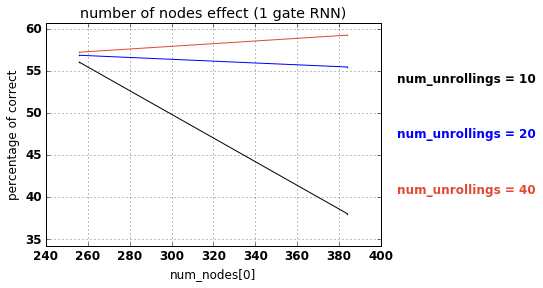

In [12]:
plot_data, _ = one_gate_plots.one_key_layout_data('one_gate_1',
                                                                'num_nodes[0]',
                                         "num_unrollings")
one_gate_plots.save_layout(plot_data[0],
                    'number of nodes effect (1 gate RNN)',
                    ['plots'],
                    'ns80000;decay_steps_30;ilr_1.;dc0.9')
one_gate_plots.draw(plot_data[0], 'number of nodes effect (1 gate RNN)')

In [13]:
iter_num = 10
results_GL = list()   
for i in range(iter_num):
    model = one_gate(64,
                             vocabulary,
                             characters_positions_in_vocabulary,
                             30,
                             1,
                             [128],
                             0.,
                             train_text,
                             valid_text)
    model.simple_run(200,
                         'one_gate/variables/average#%s' % i,
                            20000,
                               4000,
                               5000,        #learning has a chance to be stopped after every block of steps
                               30,
                               0.9,
                               3,
                    fixed_num_steps=True)
    results_GL.extend(model._results)
    model.destroy()
    del model

Number of steps = 20000     Percentage = 48.70%     Time = 1061s     Learning rate = 0.0424
Number of steps = 20000     Percentage = 48.47%     Time = 1051s     Learning rate = 0.0424
Number of steps = 20000     Percentage = 48.33%     Time = 1047s     Learning rate = 0.0424
Number of steps = 20000     Percentage = 48.46%     Time = 1058s     Learning rate = 0.0424
Number of steps = 20000     Percentage = 48.53%     Time = 1029s     Learning rate = 0.0424
Number of steps = 20000     Percentage = 48.63%     Time = 1047s     Learning rate = 0.0424
Number of steps = 20000     Percentage = 48.54%     Time = 1065s     Learning rate = 0.0424
Number of steps = 20000     Percentage = 48.34%     Time = 1056s     Learning rate = 0.0424
Number of steps = 20000     Percentage = 48.73%     Time = 1055s     Learning rate = 0.0424
Number of steps = 20000     Percentage = 48.57%     Time = 1064s     Learning rate = 0.0424


In [15]:
folder_name = 'one_gate'
file_name = 'average%s_ns20k_dc0.9_hl667.pickle' % iter_num
force = True
pickle_dump = {'results_GL': results_GL}
if not os.path.exists(folder_name):
    try:
        os.makedirs(folder_name)
    except Exception as e:
        print("Unable create folder '%s'" % folder_name, ':', e)    
print('Pickling %s.' % (folder_name + '/' + file_name))
try:
    with open(folder_name + '/' + file_name, 'wb') as f:
        pickle.dump(pickle_dump, f, pickle.HIGHEST_PROTOCOL)
except Exception as e:
    print('Unable to save data to', file_name, ':', e)

Pickling one_gate/average10_ns20k_dc0.9_hl667.pickle.


In [ ]:
iter_num = 10
pickle_file = 'average%s_ns20k_dc0.9_hl667.pickle' % num_iter

with open(folder_name + '/' + pickle_file, 'rb') as f:
  save = pickle.load(f)
  results_GL = save['results_GL']
  del save  # hint to help gc free up memory

In [16]:
average = 0
for result in results_GL:
    average += result['data']['train']['percentage'][-1]
average /= len(results_GL)

In [17]:
print(average)

48.5302864583


In [20]:
iter_num = 10
for i in range(iter_num):
    model = one_gate(64,
                                 vocabulary,
                                 characters_positions_in_vocabulary,
                                 30,
                                 1,
                                 [128],
                                 0.,
                                 train_text,
                                 valid_text)
    text_list, gate_list = model.run_for_analitics(model.get_gates,
                                                            'one_gate/variables/average#%s' % i,
                                                            [1000, 75, None])
    structure_vocabulary_plots(text_list,
                                gate_list,
                                'gate for letter position',
                                'mean gate',
                                ['one_gate', 'ns20000_hl667_dc0.9', 'average#%s' % i],
                                'vocabulary_structure_gate_average#%s' % i,
                                ylims = [0., 1.],
                                show=False)
    for j in range(50):
        text_plot(text_list[j],
                    gate_list[j],
                    'gate',
                    'gate',
                    ['one_gate', 'ns20000_hl667_dc0.9', 'average#%s' % i, 'text_plots'],
                    '#%s' % j,
                    show=False)
    model.destroy()
    del model
    gc.collect()